# Deep Learning final project

## **Index**

- Introduction
- Data preprocesing (Custom Data set and Waveform extraction)
    - Sentiments and music sample creation logic
    - Waveform and labeling strategy for PyTorch dataset
- State of art replication
    - ESC50 Classification Zeroshot (fuse and infuse) infuse aumentado
    - GTZAN Classification (music, music speech) text augmentation
    - ESC 50/GTZAN Text to audio retrieval
- Experiments
    - Zeroshot created sentiments data set classification
    - Finetune GTZAN music classification
    - Finetune Sentiments classification 
- Discusion
- Conclusion 



# Data preprocesing

## Custom data set creation Overview

dataset_creator creates a music sentiment dataset, segmenting input audio files into 10-second chunks and associating each segment with sentiments (Epic, Happy, Sad, Suspense). It leverages `PyTorch's Dataset ` and the `librosa library `. The script organizes segments into an output folder and generates a CSV file (all_music_labels.csv) containing metadata such as file names and sentiments. The dataset structure is tailored for sentiment analysis tasks. Users can customize input audio paths, sentiments, and output locations. The code uses the pydub library for audio processing and pandas for CSV creation, providing a convenient approach to building labeled music datasets for sentiment analysis.
This data set is going to be used for some classification tasks.

## Audio Datasets Overview

audio_datasets provides utility classes for audio datasets used with the CLAP (Contrastive Learning of Audio Representations) model. The classes leverage PyTorch's `Dataset` and the `librosa` library for audio processing.

### Dataset Overview:

1. **ESC50Dataset:**
   - Contains environmental sound recordings.
   - Metadata includes categories like "dog bark," "rain," etc.


2. **GTZANDataset:**
   - Contains audio tracks from the GTZAN music genre dataset.
   - Metadata includes genres such as "blues," "pop," etc.


3. **MusicSentimentDataset:**
   - Contains audio clips labeled with sentiment (e.g., happy, sad).
   - Metadata includes sentiment labels and filenames.
   

### Usage Example:

To use these classes, instantiate an object of the desired dataset class, providing the path to the metadata CSV file and the directory containing audio files. Access audio samples, display waveforms, play audio, and more.

Example:
```python
# Instantiate ESC50Dataset
esc50_dataset = ESC50Dataset(metadata_path='path/to/esc50_metadata.csv', audio_dir='path/to/audio/files')

# Display waveform of the first audio file
esc50_dataset.display_waveform(idx=0)

# Play audio in Jupyter notebook
esc50_dataset.play_audio_in_jupyter(idx=0)


# State of the Art Replication 

This section aims to replicate and extend state-of-the-art experiments in audio classification using the Contrastive Learning of Audio Representations (CLAP) model. Leveraging `PyTorch`, `librosa` , and the Hugging Face transformers library, we replicate experiments on two widely used audio datasets: ESC50 and GTZAN. Our approach encompasses zero-shot classification, fusion, and infusion techniques utilizing different CLAP pre-trained models. We explore the effectiveness of contrastive learning in capturing rich audio representations, comparing the performance of distinct transformer architectures. The experiments serve as a foundation for further investigations and custom applications in audio analysis

## Audio Classifier Overview

The `AudioClassifier` class facilitates audio classification experiments using the CLAP (Contrastive Learning of Audio Representations) model. This class is equipped with functionalities for dataset initialization, model loading, prediction, and evaluation.

### Example of usage
```python
audio_classifier = AudioClassifier(
    metadata_path='path/to/metadata.csv',
    audio_dir='path/to/audio/files',
    dataset_class='ESC50',
    model_id='laion/clap-htsat-fused',
    text_augmentation=True
)


good_predictions, bad_predictions, accuracy, true_labels, pred_labels = audio_classifier.predict_and_evaluate(batch_size=32)
audio_classifier.plot_predictions_by_class(good_predictions, bad_predictions)
audio_classifier.get_confusion_matrix(true_labels, pred_labels)

In [3]:
import os
os.chdir('/homes/r23ferna/Documents/Deep-Learning-CLAP/')


In [4]:
import sys
sys.path.append('/homes/r23ferna/Documents/Deep-Learning-CLAP/')


## ESC 50 Zero Shot classification 

Running model: laion/clap-htsat-fused over dataset: ESC50 with length: 2000


  0%|          | 0/63 [00:00<?, ?it/s]

After running zero-shot classification over 2000 samples on ESC50 dataset, the accuracy is: 0.831


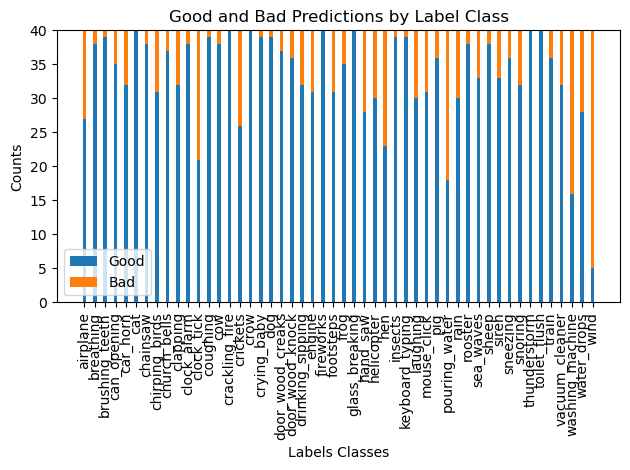

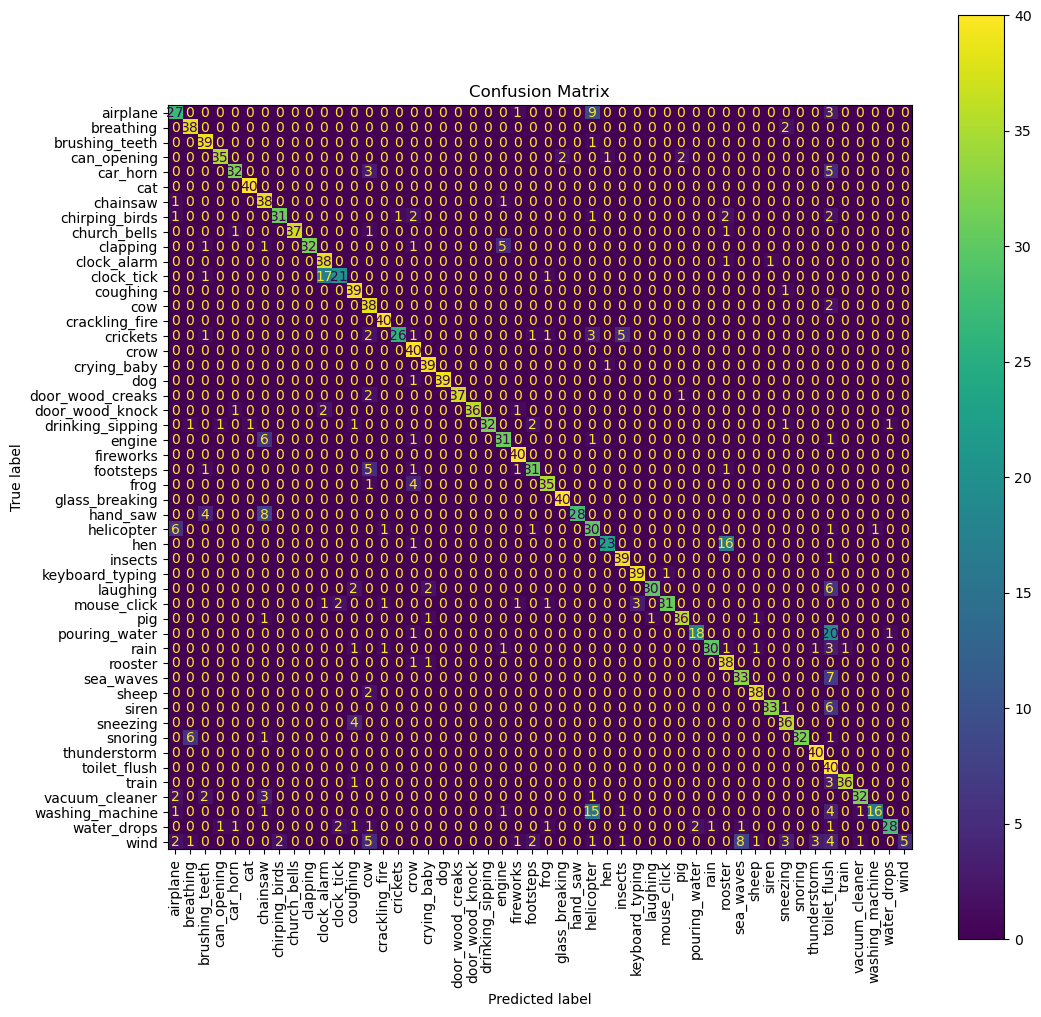

In [3]:
## ZERO SHOT ESC 50_ htsat-fused, no text augmentation

from audio_classification import AudioClassifier

esc50_zs_fus = AudioClassifier(
    metadata_path = "/homes/r23ferna/Documents/ESC-50-master/meta/esc50.csv",
    audio_dir = "/homes/r23ferna/Documents/ESC-50-master/audio",
    dataset_class = 'ESC50',
    model_id = "laion/clap-htsat-fused",
    text_augmentation= False)

good_predictions_esc50_zs_fus, bad_predictions_esc50_zs_fus, accuaracy_esc50_zs_fus, true_labels_esc50_zs_fus, pred_labels_esc50_zs_fus = esc50_zs_fus.predict_and_evaluate(
    batch_size=32)
esc50_zs_fus.plot_predictions_by_class(good_predictions_esc50_zs_fus, bad_predictions_esc50_zs_fus)
esc50_zs_fus.get_confusion_matrix(true_labels_esc50_zs_fus, pred_labels_esc50_zs_fus)

preprocessor_config.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/5.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/615M [00:00<?, ?B/s]

Running model: laion/clap-htsat-unfused over dataset: ESC50 with length: 2000


  0%|          | 0/63 [00:00<?, ?it/s]

After running zero-shot classification over 2000 samples on ESC50 dataset, the accuracy is: 0.891


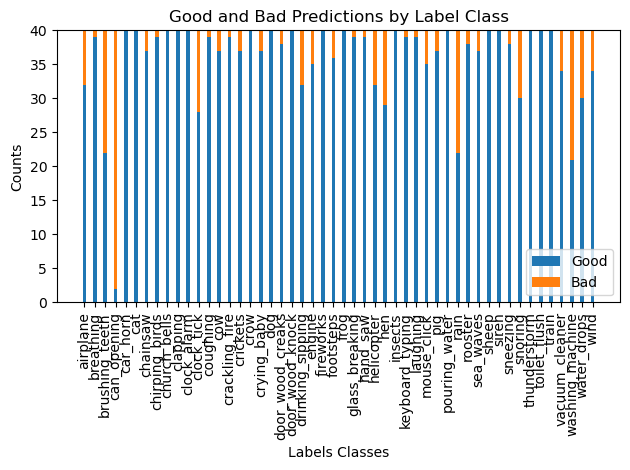

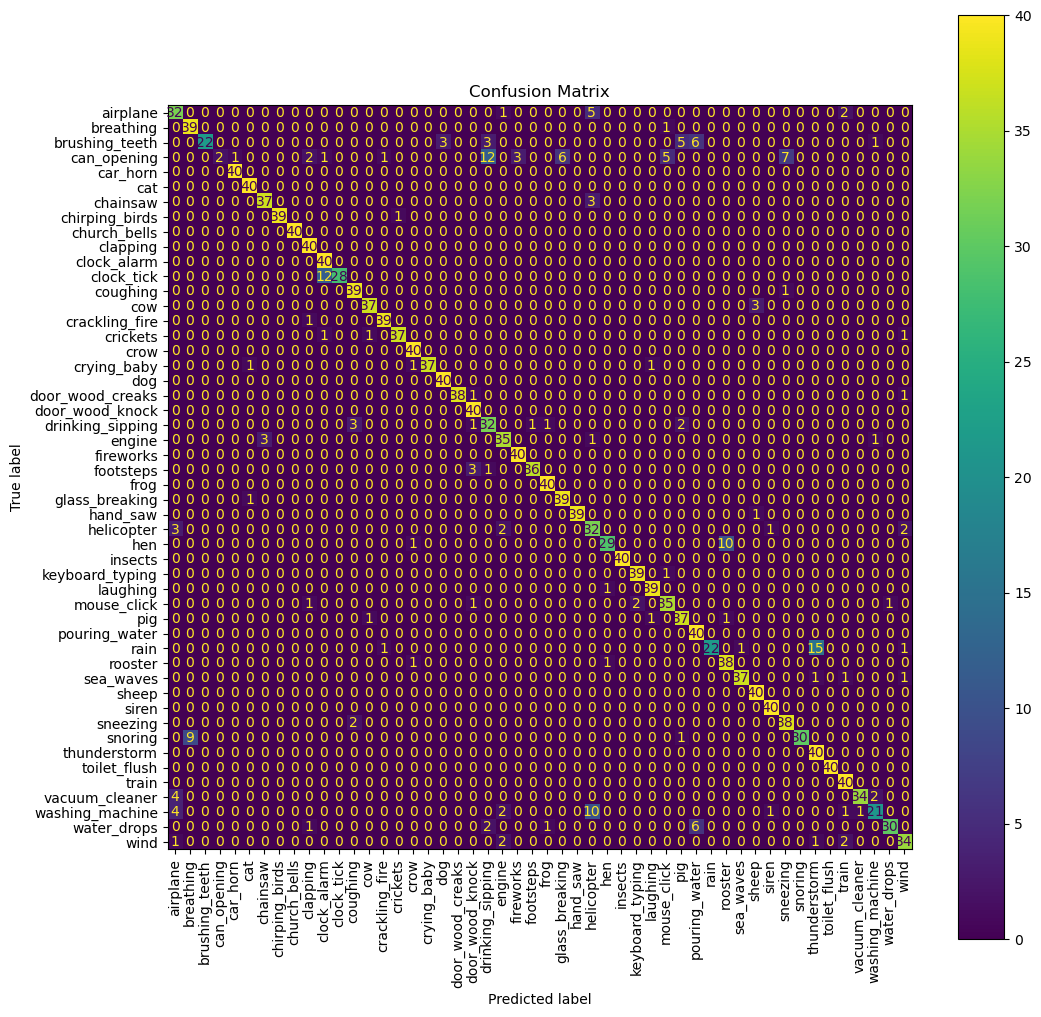

In [4]:
## ZERO SHOT ESC050 htsat-unfused, no text augmentation

from audio_classification import AudioClassifier

esc50_zs_unf = AudioClassifier(
    metadata_path = "/homes/r23ferna/Documents/ESC-50-master/meta/esc50.csv",
    audio_dir = "/homes/r23ferna/Documents/ESC-50-master/audio",
    dataset_class = 'ESC50',
    model_id = "laion/clap-htsat-unfused",
    text_augmentation= False)

good_predictions_esc50_zs_unf, bad_predictions_esc50_zs_unf, accuaracy_esc50_zs_unf, true_labels_esc50_zs_unf, pred_labels_esc50_zs_unf = esc50_zs_unf.predict_and_evaluate(
    batch_size=32)
esc50_zs_unf.plot_predictions_by_class(good_predictions_esc50_zs_unf, bad_predictions_esc50_zs_unf)
esc50_zs_unf.get_confusion_matrix(true_labels_esc50_zs_unf, pred_labels_esc50_zs_unf)

Running model: laion/clap-htsat-unfused over dataset: ESC50 with length: 2000


  0%|          | 0/63 [00:00<?, ?it/s]

After running zero-shot classification over 2000 samples on ESC50 dataset, the accuracy is: 0.8925


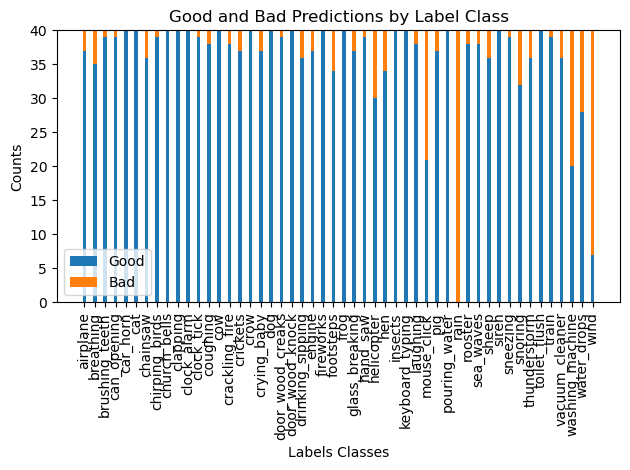

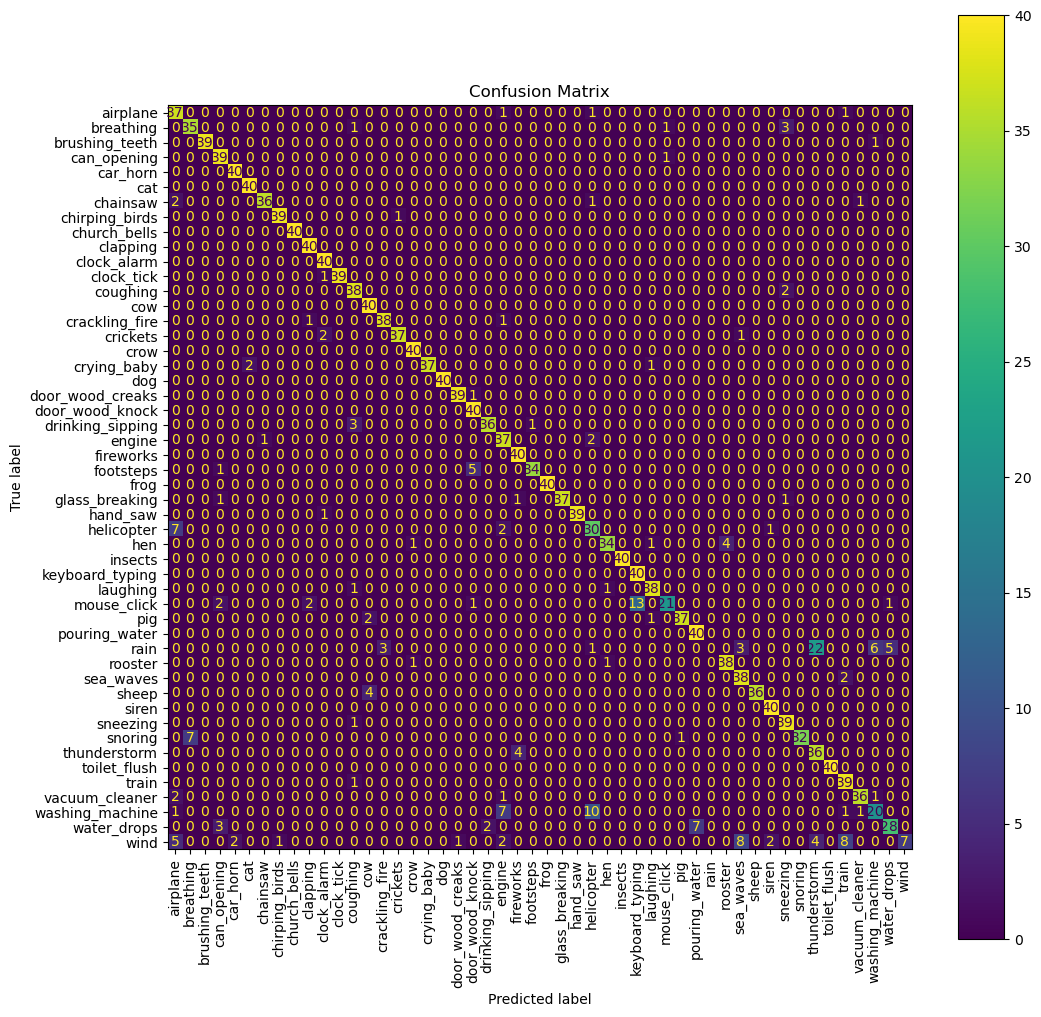

In [5]:
## ZERO SHOT ESC050 htsat-unfused, text augmentation

from audio_classification import AudioClassifier

esc50_zs_unf_aug = AudioClassifier(
    metadata_path = "/homes/r23ferna/Documents/ESC-50-master/meta/esc50.csv",
    audio_dir = "/homes/r23ferna/Documents/ESC-50-master/audio",
    dataset_class = 'ESC50',
    model_id = "laion/clap-htsat-unfused",
    text_augmentation= True)

good_predictions_esc50_zs_unf_aug, bad_predictions_esc50_zs_unf_aug, accuaracy_esc50_zs_unf_aug, true_labels_esc50_zs_unf_aug, pred_labels_esc50_zs_unf_aug = esc50_zs_unf_aug.predict_and_evaluate(
    batch_size=32)
esc50_zs_unf_aug.plot_predictions_by_class(good_predictions_esc50_zs_unf_aug, bad_predictions_esc50_zs_unf_aug)
esc50_zs_unf_aug.get_confusion_matrix(true_labels_esc50_zs_unf_aug, pred_labels_esc50_zs_unf_aug)

## GTZAN Zero Shot genres classification

###  GTZAN Zeroshot larger_clap_music

In [ ]:
GT_zs_lcm = AudioClassifier(
    metadata_path = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/genres/features_30_sec.csv",
    audio_dir = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/genres/",
    dataset_class = 'GTZAN',
    model_id = "laion/larger_clap_music",
    text_augmentation= True)

good_predictions_GT_zs_lcm, bad_predictions_GT_zs_lcm, accuaracy_GT_zs_lcm, true_labels_GT_zs_lcm, pred_labels_GT_zs_lcm = GT_zs_lcm.predict_and_evaluate(
    batch_size=32)
GT_zs_lcm.plot_predictions_by_class(good_predictions_GT_zs_lcm, bad_predictions_GT_zs_lcm)
GT_zs_lcm.get_confusion_matrix(true_labels_GT_zs_lcm, pred_labels_GT_zs_lcm)


### GTZAN Zeroshot larger_clap_music_and_speech

In [ ]:
GT_zs_lcmspch = AudioClassifier(
    metadata_path = "audios/GTZAN/features_30_sec.csv",
    audio_dir = "audios/GTZAN/genres_original",
    dataset_class = 'GTZAN',
    model_id = "laion/larger_clap_music_and_speech",
    text_augmentation= True)

good_predictions_GT_zs_lcmspch, bad_predictions_GT_zs_lcmspch, accuaracy_GT_zs_lcmspch, true_labels_GT_zs_lcmspch, pred_labels_GT_zs_lcmspch = GT_zs_lcmspch.predict_and_evaluate(
    batch_size=32)
GT_zs_lcmspch.plot_predictions_by_class(good_predictions_GT_zs_lcmspch, bad_predictions_GT_zs_lcmspch)
GT_zs_lcmspch.get_confusion_matrix(true_labels_GT_zs_lcmspch, pred_labels_GT_zs_lcmspch)

## Text to audio Retreival

### ESC50 enviromental sounds text query

In [11]:
from audio_datasets.audio_dataset import ESC50Dataset, GTZANDataset, MusicSentimentDataset
from text_to_audio import Text2Audio
metadata_path = "/homes/r23ferna/Documents/ESC-50-master/meta/esc50.csv"
audio_dir = "/homes/r23ferna/Documents/ESC-50-master/audio"
dataset_class = 'ESC50'
model_id = "laion/clap-htsat-unfused"
text_query = "a dog barking loud" # We can put any query

# model_id = "laion/larger_clap_music"

# Initialize the Text2Audio
text2audio = Text2Audio(metadata_path, audio_dir, dataset_class, model_id, text_query)

# Get audio embeddings
audio_embeddings = text2audio.get_audio_embeddings()

# Get similarities
similarities = text2audio.get_similarities(audio_embeddings)

# Get top indices
top_indices = text2audio.get_top_indices(similarities, k=5)

# Print the top 5 most similar audio files and their similarity scores
for idx in top_indices:
    print(f"Cosine Similarity: {similarities[idx]}")
    print(f"Audio file: {text2audio.dataset.filenames[idx]}")
    print(f"Label: {text2audio.dataset.labels[idx]}")
    print(f"Index: {idx}")    
    print("")
text2audio.dataset.play_audio_in_jupyter(top_indices[0])
    

processing audio files:   0%|          | 0/2000 [00:00<?, ?it/s]

Cosine Similarity: tensor([0.6101], device='cuda:0')
Audio file: 4-192236-A-0.wav
Label: dog
Index: 1484

Cosine Similarity: tensor([0.5853], device='cuda:0')
Audio file: 2-118964-A-0.wav
Label: dog
Index: 503

Cosine Similarity: tensor([0.5713], device='cuda:0')
Audio file: 5-212454-A-0.wav
Label: dog
Index: 1800

Cosine Similarity: tensor([0.5636], device='cuda:0')
Audio file: 4-183992-A-0.wav
Label: dog
Index: 1431

Cosine Similarity: tensor([0.5606], device='cuda:0')
Audio file: 2-122104-B-0.wav
Label: dog
Index: 522



### Music Genres generated data song query

In [5]:
from audio_datasets.audio_dataset import ESC50Dataset, GTZANDataset, MusicSentimentDataset
from text_to_audio import Text2Audio
metadata_path = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/GenresDataSet200Samp/all_music_labels.csv"
audio_dir = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/GenresDataSet200Samp/"
dataset_class = 'MusicGen'
model_id = "laion/larger_clap_music_and_speech" 
text_query = "Pop song with catchy melodies and a repetitive chorus" # We can put any query

# model_id = "laion/larger_clap_music"

# Initialize the Text2Audio
text2audio = Text2Audio(metadata_path, audio_dir, dataset_class, model_id, text_query)

# Get audio embeddings
audio_embeddings = text2audio.get_audio_embeddings()

# Get similarities
similarities = text2audio.get_similarities(audio_embeddings)

# Get top indices
top_indices = text2audio.get_top_indices(similarities, k=5)


processing audio files:   0%|          | 0/2500 [00:00<?, ?it/s]

In [7]:
# Print the top 5 most similar audio files and their similarity scores
for idx in top_indices:
    print(f"Cosine Similarity: {similarities[idx]}")
    print(f"Audio file: {text2audio.dataset.filenames[idx]}")
    print(f"Label: {text2audio.dataset.labels[idx]}")
    print(f"Index: {idx}")    
    print("")
text2audio.dataset.play_audio_in_jupyter(top_indices[0])
    

Cosine Similarity: tensor([0.5910], device='cuda:0')
Audio file: audio_segment_670.wav
Label: country
Index: 669

Cosine Similarity: tensor([0.5834], device='cuda:0')
Audio file: audio_segment_1763.wav
Label: pop
Index: 1762

Cosine Similarity: tensor([0.5710], device='cuda:0')
Audio file: audio_segment_669.wav
Label: country
Index: 668

Cosine Similarity: tensor([0.5708], device='cuda:0')
Audio file: audio_segment_1774.wav
Label: pop
Index: 1773

Cosine Similarity: tensor([0.5693], device='cuda:0')
Audio file: audio_segment_1765.wav
Label: pop
Index: 1764



In [8]:
from audio_datasets.audio_dataset import ESC50Dataset, GTZANDataset, MusicSentimentDataset
from text_to_audio import Text2Audio
metadata_path = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/GenresDataSet200Samp/all_music_labels.csv"
audio_dir = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/GenresDataSet200Samp/"
dataset_class = 'MusicGen'
model_id = "laion/larger_clap_music_and_speech" 
text_query = "A Jazz Song" # We can put any query

# model_id = "laion/larger_clap_music"

# Initialize the Text2Audio
text2audio = Text2Audio(metadata_path, audio_dir, dataset_class, model_id, text_query)

# Get audio embeddings
audio_embeddings = text2audio.get_audio_embeddings()

# Get similarities
similarities = text2audio.get_similarities(audio_embeddings)

# Get top indices
top_indices = text2audio.get_top_indices(similarities, k=5)
for idx in top_indices:
    print(f"Cosine Similarity: {similarities[idx]}")
    print(f"Audio file: {text2audio.dataset.filenames[idx]}")
    print(f"Label: {text2audio.dataset.labels[idx]}")
    print(f"Index: {idx}")    
    print("")
text2audio.dataset.play_audio_in_jupyter(top_indices[0])

processing audio files:   0%|          | 0/2500 [00:00<?, ?it/s]

Cosine Similarity: tensor([0.6515], device='cuda:0')
Audio file: audio_segment_225.wav
Label: blues
Index: 224

Cosine Similarity: tensor([0.6513], device='cuda:0')
Audio file: audio_segment_165.wav
Label: blues
Index: 164

Cosine Similarity: tensor([0.6203], device='cuda:0')
Audio file: audio_segment_170.wav
Label: blues
Index: 169

Cosine Similarity: tensor([0.6148], device='cuda:0')
Audio file: audio_segment_1375.wav
Label: jazz
Index: 1374

Cosine Similarity: tensor([0.6134], device='cuda:0')
Audio file: audio_segment_239.wav
Label: blues
Index: 238



# Experiments

## Zero Shot Classification for Sentiments in music 

We will run a test using the pretrained transformer from CLAP, that gives the best result for clasifying genres in the GTZAN data set, tryin to achieve a sentiment classification, using our created data set `MusicSentiment` Dataset.


In [12]:
from audio_classification import AudioClassifier
MusicSentiment_zs = AudioClassifier(
metadata_path = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/SentimentsDataSet/all_music_labels.csv",
audio_dir = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/SentimentsDataSet/",
dataset_class = 'MusicSentiment',
model_id = "laion/larger_clap_music_and_speech", 
text_augmentation= True)


good_predictions_MusicSentiment_zs, bad_predictions_MusicSentiment_zs, accuaracy_MusicSentiment_zs, true_labels_MusicSentiment_zs, pred_labels_MusicSentiment_zs = MusicSentiment_zs.predict_and_evaluate(
    batch_size=32)
MusicSentiment_zs.plot_predictions_by_class(good_predictions_MusicSentiment_zs, bad_predictions_MusicSentiment_zs)
MusicSentiment_zs.get_confusion_matrix(true_labels_MusicSentiment_zs, pred_labels_MusicSentiment_zs)

KeyError: 'label'

## Zero Shot genres classifier for generated data set

In [17]:
import torch


In [ ]:
from audio_classification import AudioClassifier

MusicSentiment_zs = AudioClassifier(
metadata_path = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/GenresDataSet200Samp/all_music_labels.csv",
audio_dir = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/GenresDataSet200Samp/",
dataset_class = 'MusicGen",
model_id = "laion/larger_clap_music_and_speech", 
text_augmentation= True)

good_predictions_MusicSentiment_zs, bad_predictions_MusicSentiment_zs, accuaracy_MusicSentiment_zs, true_labels_MusicSentiment_zs, pred_labels_MusicSentiment_zs = MusicSentiment_zs.predict_and_evaluate(
    batch_size=32)
MusicSentiment_zs.plot_predictions_by_class(good_predictions_MusicSentiment_zs, bad_predictions_MusicSentiment_zs)
MusicSentiment_zs.get_confusion_matrix(true_labels_MusicSentiment_zs, pred_labels_MusicSentiment_zs)

SyntaxError: unterminated string literal (detected at line 6) (2141064865.py, line 6)

## Fine-Tune Audio Classifier Overview

The provided code introduces a `FineTuneAudioClassifier` class for fine-tuning a pre-trained CLAP (Contrastive Learning of Audio Representations) model. Key components include:

- Loading audio datasets (`ESC50`, `GTZAN`, or `MusicSentiment`) using respective classes.
- Initializing the CLAP processor and model.
- Handling data splitting for training, testing, and validation.
- Freezing and unfreezing model parameters for efficient training.
- Utilizing PyTorch, Transformers, and other libraries for implementation.

#### Running the Experiments

1. Initialize the `FineTuneAudioClassifier` class with dataset details and the pre-trained CLAP model.
2. Prepare datasets using the `prepare_datasets` method.
3. Define the classifier model, for example, using `nn.Linear`.
4. Train the model using the `train` method, specifying hyperparameters like `num_epochs`, `batch_size`, and `lr`.
5. Evaluate the trained model using the `evaluate` method.
6. Visualize training and validation losses with `plot_loss` and confusion matrices with `plot_confusion_matrix`.
7. Further analysis can be performed, such as predicting and evaluating specific batches.

Example:

```python
# Initialize the FineTuneAudioClassifier
metadata_path = "audios/GTZAN/features_30_sec.csv"
audio_dir = "audios/GTZAN/genres_original"
dataset_class = 'GTZAN'
model_id = "laion/larger_clap_music_and_speech"
fine_tune_audio_classifier = FineTuneAudioClassifier(metadata_path, audio_dir, dataset_class, model_id)

# Prepare datasets
fine_tune_audio_classifier.prepare_datasets()

# Define the classifier model
classifier = nn.Linear(512, fine_tune_audio_classifier.num_classes)

# Train the model
train_losses, valid_losses = fine_tune_audio_classifier.train(classifier, num_epochs=2)

# Evaluate the model
avg_loss, accuracy, true_labels, pred_labels = fine_tune_audio_classifier.evaluate(classifier)

# Plot loss and confusion matrix
fine_tune_audio_classifier.plot_loss(train_losses, valid_losses)
fine_tune_audio_classifier.plot_confusion_matrix(true_labels, pred_labels)


## GTZAN Fine tune Classification

In [ ]:
from fine_tune_audio_classification import FineTuneAudioClassifier

metadata_path = "audios/GTZAN/features_30_sec.csv"
audio_dir = "audios/GTZAN/genres_original"
dataset_class = 'GTZAN'
model_id = "laion/larger_clap_music_and_speech"
GTZAN_fine_tune = FineTuneAudioClassifier(metadata_path, audio_dir, dataset_class, model_id)

#Prepare datasets
GTZAN_fine_tune.prepare_datasets()

#Define the classifier model
classifier_MusicSentiment_fine_tune = nn.Linear(512, GTZAN_fine_tune.num_classes)

# Train the model
train_losses_MusicSentiment_fine_tune, valid_losses_MusicSentiment_fine_tune = GTZAN_fine_tune.train(classifier_MusicSentiment_fine_tune, num_epochs=2)

# Evaluate the model
avg_loss_GTZAN_fine_tune, accuracy_GTZAN_fine_tune, true_labels_GTZAN_fine_tune, pred_labels_GTZAN_fine_tune = GTZAN_fine_tune.evaluate(classifier_MusicSentiment_fine_tune)

# train_losses, valid_losses, elapsed_time = fine_tune_audio_classifier.train(classifier)
GTZAN_fine_tune.plot_loss(train_losses_MusicSentiment_fine_tune, valid_losses_MusicSentiment_fine_tune)
GTZAN_fine_tune.plot_confusion_matrix(true_labels_GTZAN_fine_tune, pred_labels_GTZAN_fine_tune)

## Sentiments in Music Fine Tune

### 2 epochs 1 Linear Layer

Running MusicSentiment dataset with lenght: 1626


  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [1/2], Training Loss: 0.022648110781979355, Validation Loss: 0.016205562765781695


  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [2/2], Training Loss: 0.009475497914175702, Validation Loss: 0.010131572760068453
Total training time: 162.833509683609 seconds


  0%|          | 0/11 [00:00<?, ?it/s]

During Evaluation in unseen data metrics are -> Average loss: 0.011579928222609445, Accuracy: 0.8803680981595092


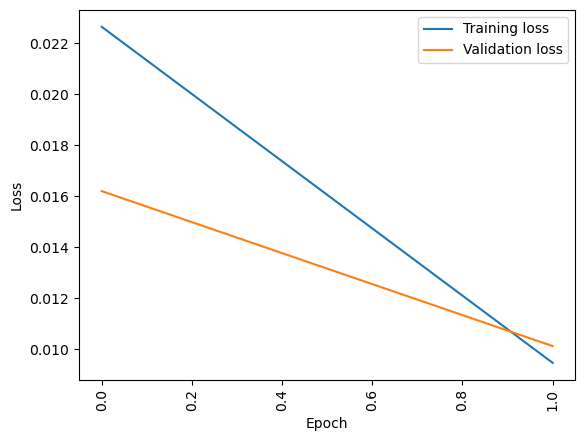

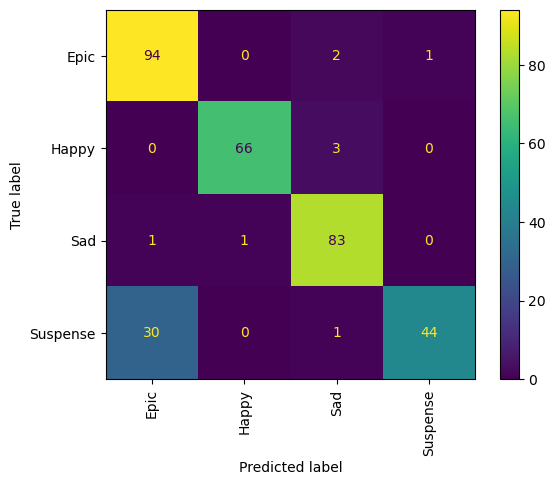

In [14]:

from fine_tune_audio_classification import FineTuneAudioClassifier
import torch.nn as nn
metadata_path = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/SentimentsDataSet/all_music_labels.csv"
audio_dir = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/SentimentsDataSet/"
dataset_class = 'MusicSentiment'
model_id = "laion/larger_clap_music_and_speech"
MusicSentiment_fine_tune = FineTuneAudioClassifier(metadata_path, audio_dir, dataset_class, model_id)

#Define the classifier model
classifier_MusicSentiment_fine_tune = nn.Linear(512, MusicSentiment_fine_tune.num_classes)

# Train the model
train_losses_MusicSentiment_fine_tune, valid_losses_MusicSentiment_fine_tune = MusicSentiment_fine_tune.train(classifier_MusicSentiment_fine_tune, num_epochs=2)

# Evaluate the model
avg_loss_MusicSentiment_fine_tune, accuracy_MusicSentiment_fine_tune, true_labels_MusicSentiment_fine_tune, pred_labels_MusicSentiment_fine_tune = MusicSentiment_fine_tune.evaluate(classifier_MusicSentiment_fine_tune)

# train_losses, valid_losses, elapsed_time = fine_tune_audio_classifier.train(classifier)
MusicSentiment_fine_tune.plot_loss(train_losses_MusicSentiment_fine_tune, valid_losses_MusicSentiment_fine_tune)
MusicSentiment_fine_tune.plot_confusion_matrix(true_labels_MusicSentiment_fine_tune, pred_labels_MusicSentiment_fine_tune)

### 2 epochs 2 Layers Relu 

Running MusicSentiment dataset with lenght: 1626


  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [1/2], Training Loss: 0.011533483068466696, Validation Loss: 0.007414330298510881


  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [2/2], Training Loss: 0.002317753177271503, Validation Loss: 0.002512514404952526
Total training time: 163.6613254547119 seconds


  0%|          | 0/11 [00:00<?, ?it/s]

During Evaluation in unseen data metrics are -> Average loss: 0.0018429002475330572, Accuracy: 0.9815950920245399


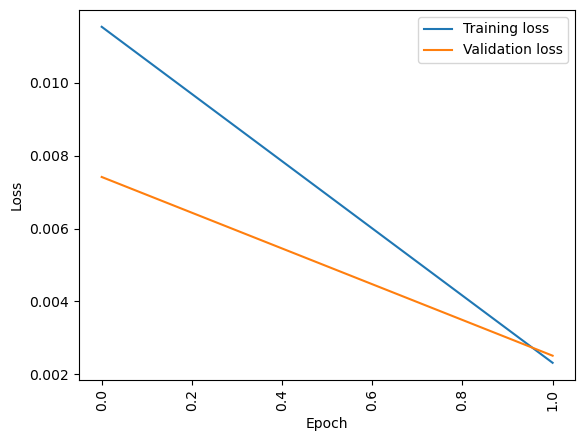

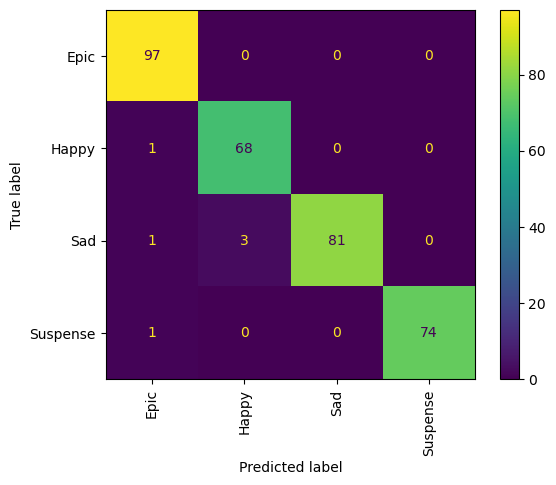

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from fine_tune_audio_classification import FineTuneAudioClassifier

class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

metadata_path = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/SentimentsDataSet/all_music_labels.csv"
audio_dir = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/SentimentsDataSet/"
dataset_class = 'MusicSentiment'
model_id = "laion/larger_clap_music_and_speech"

# Create an instance of FineTuneAudioClassifier
MusicSentiment_fine_tune = FineTuneAudioClassifier(metadata_path, audio_dir, dataset_class, model_id)

# Define the MLP classifier model
input_size = 512  # 512 input features Emmbeding
hidden_size = 256  
output_size = MusicSentiment_fine_tune.num_classes
classifier_MusicSentiment_fine_tune = MLPClassifier(input_size, hidden_size, output_size)

# Train the model
train_losses_MusicSentiment_fine_tune, valid_losses_MusicSentiment_fine_tune = MusicSentiment_fine_tune.train(
    classifier_MusicSentiment_fine_tune, 
    num_epochs=2, 
)

# Evaluate the model
avg_loss_MusicSentiment_fine_tune, accuracy_MusicSentiment_fine_tune, true_labels_MusicSentiment_fine_tune, pred_labels_MusicSentiment_fine_tune = MusicSentiment_fine_tune.evaluate(
    classifier_MusicSentiment_fine_tune
)

# Plot loss and confusion matrix
MusicSentiment_fine_tune.plot_loss(train_losses_MusicSentiment_fine_tune, valid_losses_MusicSentiment_fine_tune)
MusicSentiment_fine_tune.plot_confusion_matrix(true_labels_MusicSentiment_fine_tune, pred_labels_MusicSentiment_fine_tune)


## Music Genres Classification Finetune

Running MusicGen dataset with lenght: 2500 classifying this number of clases: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch [1/5], Training Loss: 0.018384284503757953


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch [2/5], Training Loss: 0.004359565275721252


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch [3/5], Training Loss: 0.00361522511113435


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch [4/5], Training Loss: 0.0030633814255706967


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch [5/5], Training Loss: 0.0023947413467103615
Total training time: 625.5370583534241 seconds


  0%|          | 0/16 [00:00<?, ?it/s]

During Evaluation in unseen data metrics are -> Average loss: 0.00504009535163641, Accuracy: 0.942


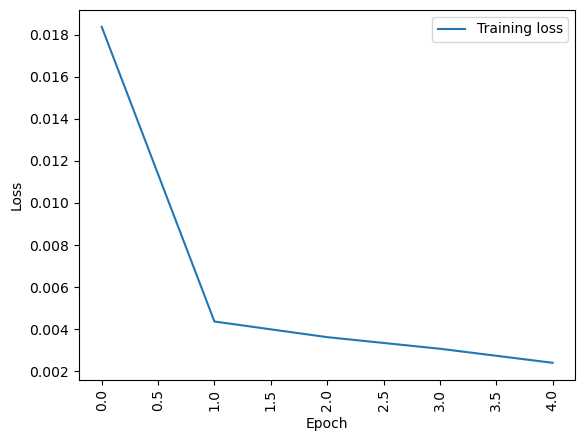

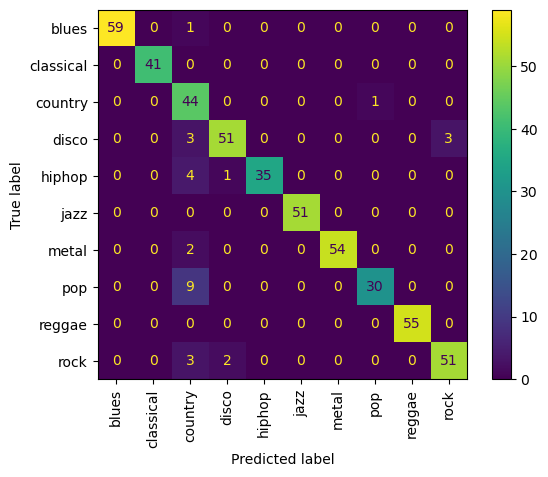

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from fine_tune_audio_classification import FineTuneAudioClassifier

class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

metadata_path = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/GenresDataSet200Samp/all_music_labels.csv"
audio_dir = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/GenresDataSet200Samp/"
dataset_class = 'MusicGen'
model_id = "laion/larger_clap_music_and_speech" 

# Create an instance of FineTuneAudioClassifier
MusicGen_fine_tune = FineTuneAudioClassifier(metadata_path, audio_dir, dataset_class, model_id)

# Define the MLP classifier model
input_size = 512  # 512 input features Emmbeding
hidden_size = 256  
output_size = 10
classifier_MusicGen_fine_tune = MLPClassifier(input_size, hidden_size, output_size)

# Train the model
train_losses_MusicGen_fine_tune = MusicGen_fine_tune.train(
    classifier_MusicGen_fine_tune, 
    num_epochs=5, 
)

# Evaluate the model
avg_loss_MusicGen_fine_tune, accuracy_MusicGen_fine_tune, true_labels_MusicGen_fine_tune, pred_labels_MusicGen_fine_tune = MusicGen_fine_tune.evaluate(
    classifier_MusicGen_fine_tune
)

# Plot loss and confusion matrix
MusicGen_fine_tune.plot_loss(train_losses_MusicGen_fine_tune)
MusicGen_fine_tune.plot_confusion_matrix(true_labels_MusicGen_fine_tune, pred_labels_MusicGen_fine_tune)

In [14]:
#classifier.load_state_dict(torch.load('experiments/fine_tune_models/fine_tuned_clap_model.pth'))
audio_path = '/homes/r23ferna/Téléchargements/y2mate.is - Donna Summer 1948 2012 On The Radio Moroder Summer 1979 Lyrics-gPzMxB2uct0-128k-1702552507.mp3'
MusicGen_fine_tune.predict(audio_path,classifier_MusicGen_fine_tune)

Predicted class: disco
The predicted class for the audio file /homes/r23ferna/Téléchargements/y2mate.is - Donna Summer 1948 2012 On The Radio Moroder Summer 1979 Lyrics-gPzMxB2uct0-128k-1702552507.mp3 is disco.


# Discussion